# XGBoost Predictive Model for TikTok's Claim Classification: EDA, Hypothesis Testing, Logistic Regression, Tree-Based Models

###  4th Jupyter Notebook -- Regression Analysis 

In [1]:
# Importing packages for data manipulation, preprocessing, modeling
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [2]:
data = pd.read_csv("tiktok-dataset.csv")

**Note:**

The purposes of EDA prior building regression model are:

- To identify data anomalies such as outliers and class imbalance that might affect the modeling.

- To verify model assumptions such as no severe multicollinearity.

In [3]:
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.shape

(19382, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [6]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [7]:
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [8]:
data_V2 = data.dropna(axis = 0)

In [9]:
data_V2.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [10]:
# Checking for duplicates
data_V2.duplicated().sum()

0

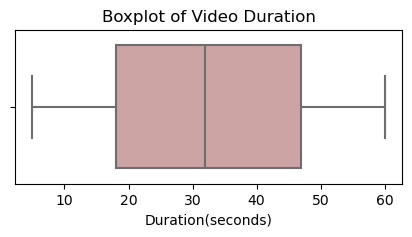

In [11]:
# Boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize = (5,2))
sns.boxplot(data = data_V2, x = 'video_duration_sec', color = 'lightcoral', saturation = 0.35)
plt.title('Boxplot of Video Duration')
plt.xlabel('Duration(seconds)')
plt.show()

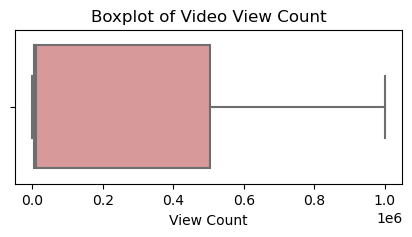

In [12]:
# Boxplot to visualize distribution of `video_view_count`
plt.figure(figsize = (5,2))
sns.boxplot(data = data_V2, x = 'video_view_count', color = 'lightcoral', saturation = 0.55)
plt.title('Boxplot of Video View Count')
plt.xlabel('View Count')
plt.show()

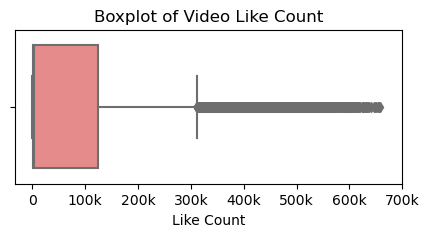

In [13]:
# Boxplot to visualize distribution of `video_like_count`
plt.figure(figsize = (5,2))
ax = sns.boxplot(data = data_V2, x = 'video_like_count', color = 'lightcoral', saturation = 0.80)
plt.title('Boxplot of Video Like Count')
plt.xlabel('Like Count')
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)] 
ax.set_xticks(range(0,7*10**5+1,10**5)) 
ax.set_xticklabels(labels)
plt.show()

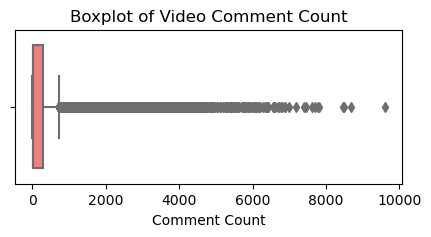

In [14]:
# Boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize = (5,2))
sns.boxplot(data = data_V2, x = 'video_comment_count', color = 'lightcoral', saturation = 1)
plt.title('Boxplot of Video Comment Count')
plt.xlabel('Comment Count')
plt.show()

In [15]:
# Checking outliers for video_like_count and video_comment_count variables

count_columns = ['video_like_count', 'video_comment_count']

for column in count_columns:
    Q1 = data_V2[column].quantile(0.25)
    Q3 = data_V2[column].quantile(0.75) 
    IQR = Q3-Q1
    outlier_threshold = Q3 + 1.5 * IQR

    outlier_count = (data_V2[column] > outlier_threshold).sum()

    print(f'Number of outliers for {column}:', outlier_count)

Number of outliers for video_like_count: 1726
Number of outliers for video_comment_count: 2789


In [16]:
# Identifying outliers for video_like_count 

Q1 = data_V2['video_like_count'].quantile(0.25)
Q3 = data_V2['video_like_count'].quantile(0.75) 
IQR = Q3-Q1

upper_threshold = Q3 + 1.5 * IQR
data_V2.loc[data_V2['video_like_count'] > upper_threshold, 'video_like_count']

6       486192.0
12      434565.0
13      497236.0
27      329068.0
28      332569.0
          ...   
9586    455662.0
9587    456631.0
9597    568550.0
9603    460743.0
9604    360080.0
Name: video_like_count, Length: 1726, dtype: float64

In [17]:
# Identifying outliers for video_comment_count 

Q1 = data_V2['video_comment_count'].quantile(0.25)
Q3 = data_V2['video_comment_count'].quantile(0.75) 
IQR = Q3-Q1

upper_threshold = Q3 + 1.5 * IQR
data_V2.loc[data_V2['video_comment_count'] > upper_threshold, 'video_comment_count']

5       1857.0
6       5446.0
9       2540.0
12      1411.0
13       805.0
         ...  
9594     747.0
9597    2875.0
9603    3372.0
9604    2432.0
9605     794.0
Name: video_comment_count, Length: 2789, dtype: float64

In [18]:
# Displaying verified/unverified proportions to examine class balance
data_V2['verified_status'].value_counts(normalize = True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

**Remarks:**
- Approx. 94.2% of the dataset belongs to videos posted by unverified accounts.
- In contrast, 5.8% of videos belongs to verified accounts. 
- The outcome variable(verified/unverified) of logistic regression is not balanced.

In [19]:
# Resampling to establish class balance in outcome variable

# Identify data points from majority and minority classes
data_majority = data_V2[data_V2['verified_status'] == 'not verified']
data_minority = data_V2[data_V2['verified_status'] == 'verified']

# Upsample the minority class (which is "verified")
data_minority_upsample = resample(data_minority, replace = True, 
                         n_samples = len(data_majority), random_state = 0)

# Combine majority class with upsampled minority class
data_upsample = pd.concat([data_majority, data_minority_upsample]).reset_index(drop = True)

# Display new class counts
data_upsample

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...
35763,4736,claim,9170014897,42,i learned on social media a claim that most c...,verified,active,993273.0,294351.0,112538.0,126.0,62.0
35764,14662,opinion,4841249433,55,my family's point of view is that a single day...,verified,active,6688.0,2431.0,449.0,42.0,3.0
35765,18418,opinion,8292890373,39,my colleagues are willing to wager that the ea...,verified,active,5009.0,1418.0,155.0,17.0,0.0
35766,10760,opinion,4107838619,16,my friends feel that one strand of hair can ho...,verified,active,921.0,55.0,19.0,1.0,0.0


In [20]:
print(data_upsample['verified_status'].value_counts(normalize = False))
print('')
print(data_upsample['verified_status'].value_counts(normalize = True))

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64


In [21]:
# Avg. `video_transcription_text` length for claims and opinions
data_upsample[['verified_status', 'video_transcription_text']].groupby(
    by = 'verified_status')[['video_transcription_text']].agg(
    func = lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


In [22]:
# Extracting each `video_transcription_text` length and place it as column to df as potential feature in model
data_upsample['video_text_length'] = data_upsample['video_transcription_text'].apply(func = lambda text: len(text))

data_upsample.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


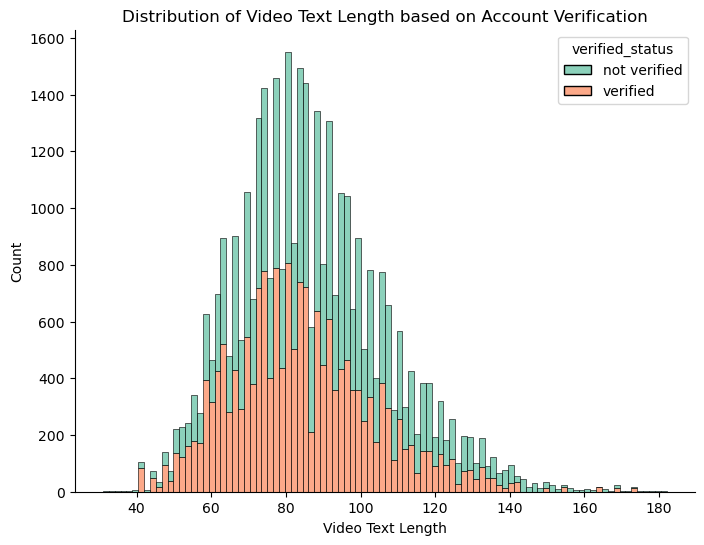

In [23]:
# Histogram of `video_transcription_text` length for videos posted by verified accounts by unverified accounts

plt.figure(figsize = (8,6))
sns.histplot(data = data_upsample, x = 'video_text_length', hue = 'verified_status',
             multiple = 'stack', shrink = 1, palette = 'Set2')
plt.title('Distribution of Video Text Length based on Account Verification')
plt.xlabel('Video Text Length')
plt.ylabel('Count')

plt.savefig("Distribution-of-Video-Text-Length-Based-on-Account.png", dpi = 300, bbox_inches = 'tight')
plt.show()

### Examining Correlations among Features

In [24]:
# Correlation matrix to determine most correlated variables
data_upsample.corr(numeric_only = True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
video_text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


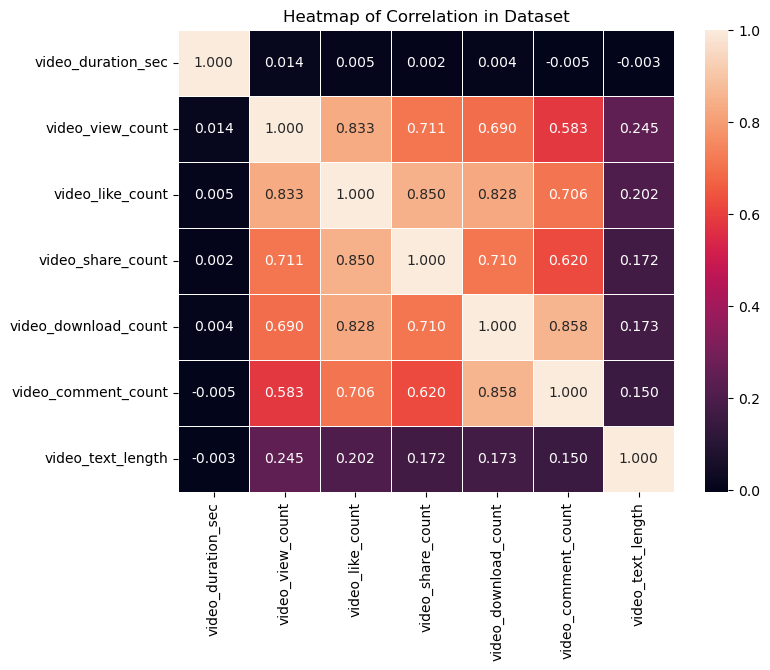

In [25]:
# Heatmap to visualize correlation among variables ---  logistic regression  assumes no severe multicollinearity among the features

plt.figure(figsize = (8,6))
sns.heatmap(data_upsample[['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count',
                          'video_download_count', 'video_comment_count', 'video_text_length', 
                           'claim_status', 'author_ban_status']].corr(numeric_only = True), 
            annot = True, fmt = '.3f', linewidth = 0.7)
plt.title('Heatmap of Correlation in Dataset')

plt.savefig("Correlation-Heatmap.png", dpi = 300, bbox_inches = 'tight')
plt.show()

**Remarks:**

The heatmap (above) displays that following pairs are strongly correlated: 
- 'video_comment_count' and 'video_download_count'
- 'video_like_count' and 'video_share_count'

To meet **no severe multicollinearity** assumption, 'video_download_count' and 'video_share_count' can be excluded. 
'Video_view_count', 'video_like_count', and 'video_comment_count' can be kept as variables that quantify video metrics.

And, 'video_view_count', 'video_share_count', and 'video_download_count' can be 2nd variable groups. 

### Selecting Variables

In [26]:
df_subset1 = data_upsample[['video_duration_sec', 'verified_status', 'claim_status', 'author_ban_status',
                             'video_view_count', 'video_like_count', 'video_comment_count']]
df_subset1

,video_duration_sec,verified_status,claim_status,author_ban_status,video_view_count,video_like_count,video_comment_count
0,59,not verified,claim,under review,343296.0,19425.0,0.0
1,32,not verified,claim,active,140877.0,77355.0,684.0
2,31,not verified,claim,active,902185.0,97690.0,329.0
3,25,not verified,claim,active,437506.0,239954.0,584.0
4,19,not verified,claim,active,56167.0,34987.0,152.0
...,...,...,...,...,...,...,...
35763,42,verified,claim,active,993273.0,294351.0,62.0
35764,55,verified,opinion,active,6688.0,2431.0,3.0
35765,39,verified,opinion,active,5009.0,1418.0,0.0
35766,16,verified,opinion,active,921.0,55.0,0.0


In [27]:
df_subset1.dtypes

video_duration_sec       int64
verified_status         object
claim_status            object
author_ban_status       object
video_view_count       float64
video_like_count       float64
video_comment_count    float64
dtype: object

- **Dependent variable 'verified_status' cannot have object data type.**
- To create model's plot (sns.regplot) for visualization later, the independent variable 'video_duration_sec' cannot integer.
- Also, variables claim_status and author_ban_status cannot have object data type.

In [28]:
df_subset1 = df_subset1.astype({'video_duration_sec': float})

In [29]:
df_subset1.dtypes

video_duration_sec     float64
verified_status         object
claim_status            object
author_ban_status       object
video_view_count       float64
video_like_count       float64
video_comment_count    float64
dtype: object

In [30]:
df_subset1['verified_status'] = OneHotEncoder(drop = 'first').fit_transform(
    df_subset1[['verified_status']]).toarray()

In [31]:
df_subset1.head()

,video_duration_sec,verified_status,claim_status,author_ban_status,video_view_count,video_like_count,video_comment_count
0,59.0,0.0,claim,under review,343296.0,19425.0,0.0
1,32.0,0.0,claim,active,140877.0,77355.0,684.0
2,31.0,0.0,claim,active,902185.0,97690.0,329.0
3,25.0,0.0,claim,active,437506.0,239954.0,584.0
4,19.0,0.0,claim,active,56167.0,34987.0,152.0


In [32]:
# Selecting outcome variable
y = df_subset1['verified_status']

In [33]:
# Selecting independent variables
X = df_subset1[['video_duration_sec', 'claim_status', 'author_ban_status',
                  'video_view_count', 'video_like_count', 'video_comment_count']]

X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_like_count,video_comment_count
0,59.0,claim,under review,343296.0,19425.0,0.0
1,32.0,claim,active,140877.0,77355.0,684.0
2,31.0,claim,active,902185.0,97690.0,329.0
3,25.0,claim,active,437506.0,239954.0,584.0
4,19.0,claim,active,56167.0,34987.0,152.0


In [34]:
X_to_encode = X[['claim_status', 'author_ban_status']]
X_to_encode 

,claim_status,author_ban_status
0,claim,under review
1,claim,active
2,claim,active
3,claim,active
4,claim,active
...,...,...
35763,claim,active
35764,opinion,active
35765,opinion,active
35766,opinion,active


In [35]:
# Setting up encoder for one-hot encoding 

X_encoder = OneHotEncoder(drop = 'first', sparse_output = False)

In [36]:
X_encoded = X_encoder.fit_transform(X_to_encode)

In [37]:
X_encoded

array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [38]:
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [39]:
X_encoded_df = pd.DataFrame(data = X_encoded, columns = X_encoder.get_feature_names_out())
X_encoded_df.head(10)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0
5,0.0,0.0,1.0
6,0.0,0.0,0.0
7,0.0,0.0,0.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [40]:
X

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_like_count,video_comment_count
0,59.0,claim,under review,343296.0,19425.0,0.0
1,32.0,claim,active,140877.0,77355.0,684.0
2,31.0,claim,active,902185.0,97690.0,329.0
3,25.0,claim,active,437506.0,239954.0,584.0
4,19.0,claim,active,56167.0,34987.0,152.0
...,...,...,...,...,...,...
35763,42.0,claim,active,993273.0,294351.0,62.0
35764,55.0,opinion,active,6688.0,2431.0,3.0
35765,39.0,opinion,active,5009.0,1418.0,0.0
35766,16.0,opinion,active,921.0,55.0,0.0


In [41]:
X = X.drop(columns = ['claim_status', 'author_ban_status'])
X

,video_duration_sec,video_view_count,video_like_count,video_comment_count
0,59.0,343296.0,19425.0,0.0
1,32.0,140877.0,77355.0,684.0
2,31.0,902185.0,97690.0,329.0
3,25.0,437506.0,239954.0,584.0
4,19.0,56167.0,34987.0,152.0
...,...,...,...,...
35763,42.0,993273.0,294351.0,62.0
35764,55.0,6688.0,2431.0,3.0
35765,39.0,5009.0,1418.0,0.0
35766,16.0,921.0,55.0,0.0


In [42]:
X_final = pd.concat([X.reset_index(drop = True), X_encoded_df], axis = 1)
X_final

,video_duration_sec,video_view_count,video_like_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,59.0,343296.0,19425.0,0.0,0.0,0.0,1.0
1,32.0,140877.0,77355.0,684.0,0.0,0.0,0.0
2,31.0,902185.0,97690.0,329.0,0.0,0.0,0.0
3,25.0,437506.0,239954.0,584.0,0.0,0.0,0.0
4,19.0,56167.0,34987.0,152.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
35763,42.0,993273.0,294351.0,62.0,0.0,0.0,0.0
35764,55.0,6688.0,2431.0,3.0,1.0,0.0,0.0
35765,39.0,5009.0,1418.0,0.0,1.0,0.0,0.0
35766,16.0,921.0,55.0,0.0,1.0,0.0,0.0


In [43]:
y.shape

(35768,)

In [44]:
X_final.shape

(35768, 7)

### Model Building

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.25, random_state = 0)

In [46]:
# Confirming the dimensions of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

In [47]:
# Construct a logistic regression model and fit it to the training set
clf_1 = LogisticRegression(random_state = 0, max_iter = 800).fit(X_train, y_train)

In [48]:
clf_1.coef_

array([[ 8.39033066e-03, -2.28102186e-06, -1.69572134e-07,
         1.13486022e-04,  3.74035235e-04, -1.65969011e-05,
        -1.05946962e-06]])

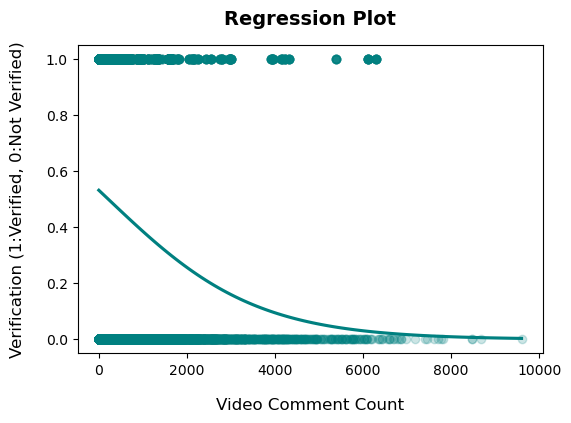

In [49]:
plt.figure(figsize = (6,4))
sns.regplot(x = 'video_comment_count', y = 'verified_status', data = df_subset1,
           logistic = True, ci = None, color = 'teal', scatter_kws = {'alpha': 0.2})
plt.xlabel('Video Comment Count', fontsize = 12, labelpad = 15)
plt.ylabel('Verification (1:Verified, 0:Not Verified)', fontsize = 12, labelpad = 15)
plt.title('Regression Plot', fontweight = 'bold', fontsize = 14, pad = 15)

plt.savefig("Verification-vs-Video-Comment-Count-Regression-Plot.png", dpi = 300, bbox_inches = 'tight')
plt.show()

### Model Results and Evaluation

In [50]:
# Using the logistic regression model to get predictions on the encoded testing set
y_pred = clf_1.predict(X_test)

In [51]:
# Displaying the predictions on the encoded testing set
print(y_pred)

[1. 1. 0. ... 1. 0. 1.]


In [52]:
# Confirming shape of each training and testing set
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26826, 7), (26826,), (8942, 7), (8942,))

### Visualization of Model Results

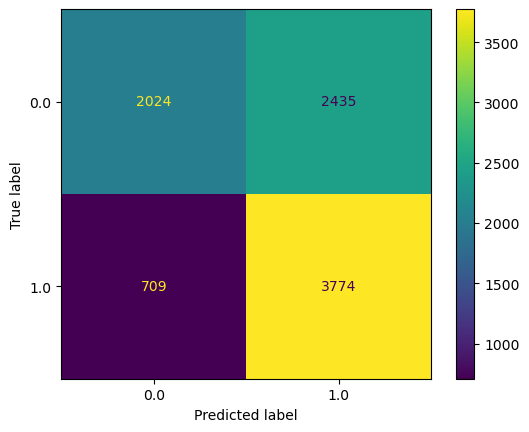

In [53]:
# Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf_1.classes_)

display_cm = metrics.ConfusionMatrixDisplay(cm, display_labels = clf_1.classes_)
display_cm.plot()
plt.show()

In [54]:
# Create a classification report
print('Precision:', metrics.precision_score(y_test, y_pred)) 
print('Recall:', metrics.recall_score(y_test, y_pred)) 
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) 
print('F1 Score:', metrics.f1_score(y_test, y_pred))

Precision: 0.6078273473989371
Recall: 0.8418469774704439
Accuracy: 0.6484008051889958
F1 Score: 0.7059483726150393


In [55]:
from sklearn.metrics import classification_report

target_labels = ['verified', 'not verified']
print(classification_report(y_test, y_pred, target_names = target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not verified       0.61      0.84      0.71      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



**Remarks:**
1) The weighted average represents the combined metrics for both groups (verified/not verified) of the target variable.
2) The classification report displayed that the logistic regression model had precision of 67% and recall of 65%.
3) The model also achieved accuracy of 63%.
4) The "verified" group had its own precision/recall metrics: precision of 74% and recall of 45%.
5) The "not verified" group had its own precision of 61% and recall of 84% scores.

### Interpreting Model Coefficients**

In [56]:
pd.DataFrame(data = {"Feature Name":clf_1.feature_names_in_, "Model Coefficient":clf_1.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.390331e-03
1,video_view_count,-2.281022e-06
2,video_like_count,-1.695721e-07
3,video_comment_count,1.134860e-04
4,claim_status_opinion,3.740352e-04
5,author_ban_status_banned,-1.659690e-05
6,author_ban_status_under review,-1.059470e-06


**Conclusion**

*In nutshell, a logistic regression model for account's verification status was developed with selected features.*

1) The dataset has few strongly correlated features, which might lead to multicollinearity issues when fitting logistic regression model. Therefore,'video_share_count' and 'video_download_count' features were not included in logistic regression model.
2) Based on the model, each additional second of the video is associated with 0.009 increase in the log-odds of the user being verified.
3) The logistic regression model had mediocre predictive power.
4) Based on the estimated model coefficients, longer videos tend to be associated with higher odds of the user being verified.
5) Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.